# Import Libraries & Packages

In [29]:
%%capture
pip install --upgrade yfinance

In [30]:
%%capture
pip install ta

In [ ]:
# ===================================
# 📦 Import Required Libraries
# ===================================

# --- Basic Python & Data Handling ---
import os
import json
import joblib
import tempfile

import numpy as np
import pandas as pd

# --- Visualization ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Data Preprocessing & Feature Engineering ---
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA


# --- Model Selection & Evaluation ---
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, auc
)

# --- Machine Learning Models ---
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# --- Deep Learning Models ---
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


# --- Statistical & Time Series Analysis ---
import statsmodels.api as sm


# --- Finance & Stock Market Data ---
import yfinance as yf

# --- MLOps & Experiment Tracking ---
import mlflow
import mlflow.sklearn
import mlflow.tensorflow

# --- Pandas Display Settings ---
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


# 1.0 Data Loading & Understanding

# 1.1 Nvidia (NVDA) Stock

In [32]:
# Download NVDA stock data with multi-level columns
nvda = yf.download('NVDA', start='2010-01-01', end='2024-12-31', auto_adjust=False)

# Restructure the DataFrame to have a single level of columns
nvda = nvda.stack(level=1).reset_index()  # Stack the 'Ticker' level and reset index

# Rename the stacked level column to 'Ticker' for clarity
nvda.rename(columns={'level_1': 'Ticker'}, inplace=True)

# Display first few rows
print("NVDA Data Head:")
nvda.head()

[*********************100%***********************]  1 of 1 completed

NVDA Data Head:



C:\Users\Kenny Ogundana\AppData\Local\Temp\ipykernel_3456\3264787924.py:5: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  nvda = nvda.stack(level=1).reset_index()  # Stack the 'Ticker' level and reset index


Price,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,NVDA,0.423884,0.46225,0.4655,0.45275,0.46275,800204000
1,2010-01-05,NVDA,0.430073,0.46900,0.4740,0.46050,0.46050,728648000
2,2010-01-06,NVDA,0.432825,0.47200,0.4730,0.46425,0.46875,649168000
3,2010-01-07,NVDA,0.424342,0.46275,0.4715,0.45925,0.46950,547792000
4,2010-01-08,NVDA,0.425259,0.46375,0.4670,0.45625,0.45900,478168000


In [33]:
# Display data info
print("\nNVDA Data Info:")
print(nvda.info())

# Display summary statistics
print("\nNVDA Data Description:")
nvda.describe()


NVDA Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3773 entries, 0 to 3772
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3773 non-null   datetime64[ns]
 1   Ticker     3773 non-null   object        
 2   Adj Close  3773 non-null   float64       
 3   Close      3773 non-null   float64       
 4   High       3773 non-null   float64       
 5   Low        3773 non-null   float64       
 6   Open       3773 non-null   float64       
 7   Volume     3773 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 235.9+ KB
None

NVDA Data Description:


Price,Date,Adj Close,Close,High,Low,Open,Volume
count,3773,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000,3.773000e+03
mean,2017-07-01 04:17:14.296315648,13.945716,13.975979,14.229375,13.699341,13.976677,4.970860e+08
min,2010-01-04 00:00:00,0.203574,0.222000,0.226250,0.216250,0.218000,4.564400e+07
25%,2013-10-02 00:00:00,0.410816,0.443000,0.449500,0.435750,0.443500,3.034880e+08
50%,2017-06-30 00:00:00,3.542320,3.576250,3.632000,3.473500,3.546750,4.283480e+08
75%,2021-03-31 00:00:00,13.555346,13.591000,13.838000,13.361000,13.627250,6.025800e+08
max,2024-12-30 00:00:00,148.856064,148.880005,152.889999,146.259995,149.350006,3.692928e+09
std,NaN,28.023594,28.022693,28.542450,27.465434,28.047553,3.064658e+08


# Data Description

 Data Sources: The Stock price data and the company Financials  were sourced from Yahoo Finance API (yfinance) which covered the period of 14 years (02/01/2010 to 30/12/2024).

These features are derived from historical stock prices;

* Date: Timestamp of the stock price data.
* Open Price: Opening price of the stock on a given day.
* High Price: Highest stock price during the trading day.
* Low Price: Lowest stock price during the trading day.
* Close Price: Final price of the stock at market close.
* Adjusted Close Price: Closing price adjusted for stock splits and dividends.
* Volume: Total number of shares traded in a day.

# Comment: NVDA (NVIDIA Corporation) Statistics:

1. Total Data Points: 3,773 trading days demonstrate a substantial historical dataset for analysis.

2. Average Prices: The average prices for adjusted close, close, high, low, and open are all approximately $13.95 to $14.23, indicating consistent pricing over time, although there is a notable range between the minimum close price of $0.22 and the maximum close price of $148.88.
 
3. Standard Deviation: The high standard deviation of the high price ($28.54), slightly higher than the adjusted close price ($28.03), signifies considerable variability in the stock prices, indicating fluctuations, particularly in peak prices. This variability might be influenced by significant events affecting NVIDIA's stock performance over the observed period

4. Trading Volume: The trading volume analysis shows an average of 497.1 million shares traded per day, with a maximum volume of 3.69 billion, indicating that there were periods of intense trading activity, possibly during earnings announcements or major product releases. 

5. Quartile Analysis: Additionally, the quartile analysis indicates that 25% of the data points have an adjusted close price below $0.41, while 75% of the prices are below $13.56. The significant difference between the median and the 75th percentile points to a steep increase in price, likely due to NVIDIA's strong growth in recent years driven by advancements in AI and GPU technologies.

The analysis reveals that NVDA has shown significant long-term growth, as indicated by the difference between median and 75th percentile prices, along with relatively high trading volumes. This suggests that the stock has attracted consistent investor interest, likely due to NVIDIA’s leadership in GPU technology and AI innovation.

# 1.2 Quantum Computing(QUBT) Stock

In [34]:
# Download QUBT stock data
qubt = yf.download('QUBT', start='2010-01-01', end='2024-12-31', auto_adjust=False)

# Restructure the DataFrame to have a single level of columns
qubt = qubt.stack(level=1).reset_index()  # Stack the 'Ticker' level and reset index

# Rename the stacked level column to 'Ticker' for clarity
qubt.rename(columns={'level_1': 'Ticker'}, inplace=True)

# Display first few rows
print("QUBT Data Head:")
qubt.head()

[*********************100%***********************]  1 of 1 completed

QUBT Data Head:



C:\Users\Kenny Ogundana\AppData\Local\Temp\ipykernel_3456\3085384233.py:5: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  qubt = qubt.stack(level=1).reset_index()  # Stack the 'Ticker' level and reset index


Price,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,QUBT,190.0,190.0,190.0,180.0,190.0,29
1,2010-01-05,QUBT,220.0,220.0,220.0,190.0,190.0,212
2,2010-01-06,QUBT,194.0,194.0,220.0,190.0,220.0,99
3,2010-01-07,QUBT,200.0,200.0,200.0,190.0,194.0,137
4,2010-01-08,QUBT,190.0,190.0,200.0,190.0,200.0,70


In [35]:
# Display data info
print("\nQUBT Data Info:")
qubt.info()

# Display summary statistics
print("\nQUBT Data Description:")
qubt.describe()


QUBT Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3773 entries, 0 to 3772
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3773 non-null   datetime64[ns]
 1   Ticker     3773 non-null   object        
 2   Adj Close  3773 non-null   float64       
 3   Close      3773 non-null   float64       
 4   High       3773 non-null   float64       
 5   Low        3773 non-null   float64       
 6   Open       3773 non-null   float64       
 7   Volume     3773 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 235.9+ KB

QUBT Data Description:


Price,Date,Adj Close,Close,High,Low,Open,Volume
count,3773,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000,3.773000e+03
mean,2017-07-01 04:17:14.296315648,6.707311,6.707311,7.182021,6.160813,6.726066,7.932593e+05
min,2010-01-04 00:00:00,0.015000,0.015000,0.015000,0.015000,0.015000,0.000000e+00
25%,2013-10-02 00:00:00,0.650000,0.650000,0.681000,0.617000,0.650000,0.000000e+00
50%,2017-06-30 00:00:00,2.400000,2.400000,2.580000,2.200000,2.400000,1.000000e+02
75%,2021-03-31 00:00:00,5.180000,5.180000,5.500000,5.000000,5.100000,7.820000e+04
max,2024-12-30 00:00:00,238.000000,238.000000,240.000000,220.000000,240.000000,2.326194e+08
std,NaN,22.893922,22.893922,24.299157,21.062342,23.061480,8.652535e+06


# Comment: QUBT (Quantum Computing Inc.) Statistics:

1. Total Data Points: The analysis also covers 3,773 trading days.

2. Average Prices: The average adjusted close and close prices are around $6.71, with the high and low averages being $7.18 and $6.16, respectively. The price range, however, is quite extensive, from a minimum close of $0.015 to a maximum close of $238.00, highlighting substantial price volatility over time. 

  
3. Standard Deviation: The standard deviation of $22.89 for adjusted close indicates considerable price fluctuations, while the high price standard deviation of $24.30 underscores that the stock often experiences large price swings. This volatility could be indicative of speculative trading or company-specific announcements impacting stock prices.
  * Adjusted Close and Close: $22.89 (indicating high variability).
  * High: $24.30 (reflecting large price swings).

4. Trading Volume: The trading volume for QUBT varies significantly, with an average of around 793,259 shares per day. However, some trading days witnessed zero volume, reflecting periods of inactivity or lack of investor interest. On the other hand, the maximum volume of 232.6 million suggests that at times, the stock attracted substantial attention, potentially due to news or market sentiment shifts.

5. Quartile Analysis: The quartile analysis shows that 25% of adjusted close prices are below $0.65, while 75% are below $5.18. The large gap between the maximum price and both the average and quartile values indicates that extreme price points significantly skew the data. This could suggest periods of speculative hype or announcements related to advancements in quantum computing technologies, affecting short-term market reactions.

In contrast, QUBT’s data reflects high volatility and sporadic trading activity, which could be attributed to the niche and emerging nature of quantum computing. This volatility might make QUBT an attractive yet risky investment, where strategic timing could be crucial.

# 2.0 Feature Engineering & Exploratory Data Analysis (EDA)
📌 Feature Engineering
To support predictive modeling, the following key features were derived:

1. Returns: Captures the daily percentage change in adjusted closing prices to understand short-term fluctuations.

2. Tomorrow (Prediction): Represents the next day’s adjusted close price, serving as the prediction target in forecasting models.

3. Stock_Direction (Target Variable): A binary indicator (1 = price increase, 0 = decrease) that simplifies the prediction task to a classification problem focused on daily price movement direction.

📊 Exploratory Data Analysis (EDA)
Comprehensive analysis was conducted to understand the behavior and characteristics of the stocks:

* Historical Price Trends: Visualized adjusted close prices over time to observe long-term growth or decline   patterns.

* Daily Returns & Volatility: Evaluated market behavior using daily return distributions and calculated rolling standard deviation (21-day window) as a measure of volatility.

* Stock Returns Distribution: Assessed return symmetry and skewness using histograms and KDE plots.

* Stock Direction Distribution: Analyzed the frequency of upward vs. downward movements to understand trend tendencies.

* Market Comparison with S&P 500: Conducted correlation and regression analysis with S&P 500 returns to benchmark performance and sensitivity to broader market movements.

[*********************100%***********************]  1 of 1 completed


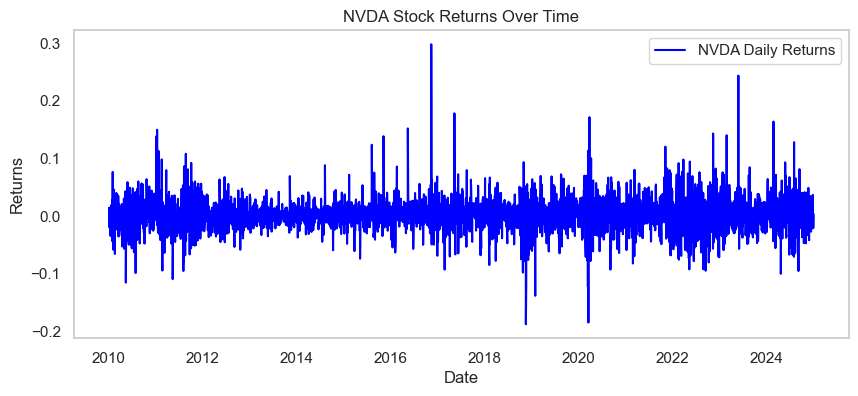

C:\Users\Kenny Ogundana\AppData\Local\Temp\ipykernel_3456\3183314793.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Stock_Direction', palette=palette)


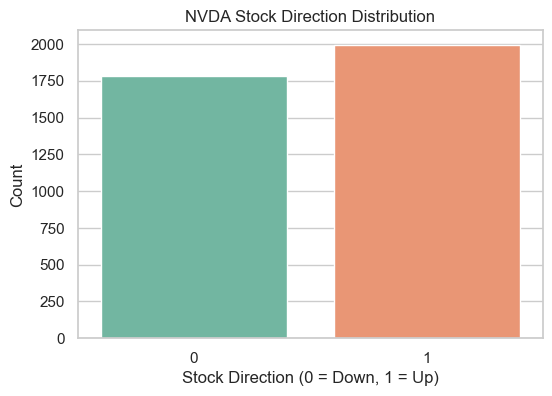

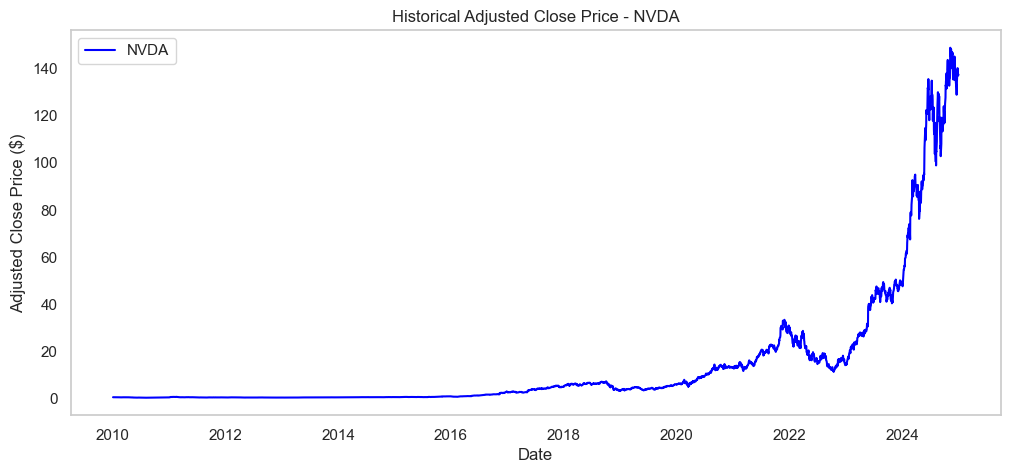

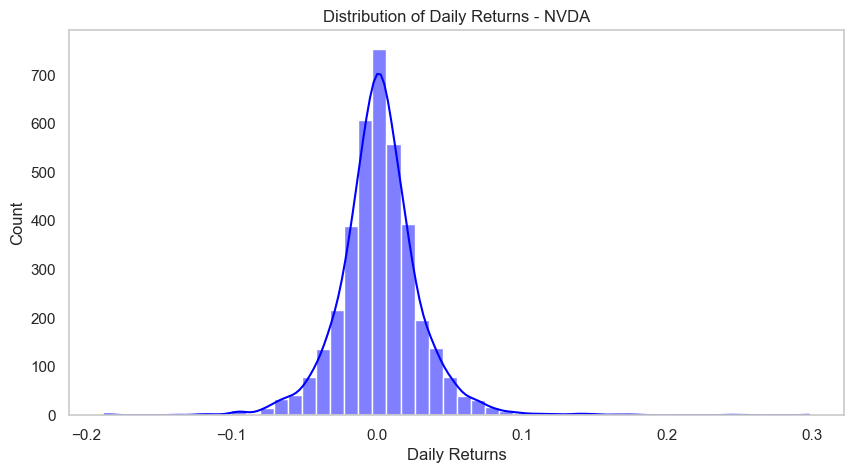

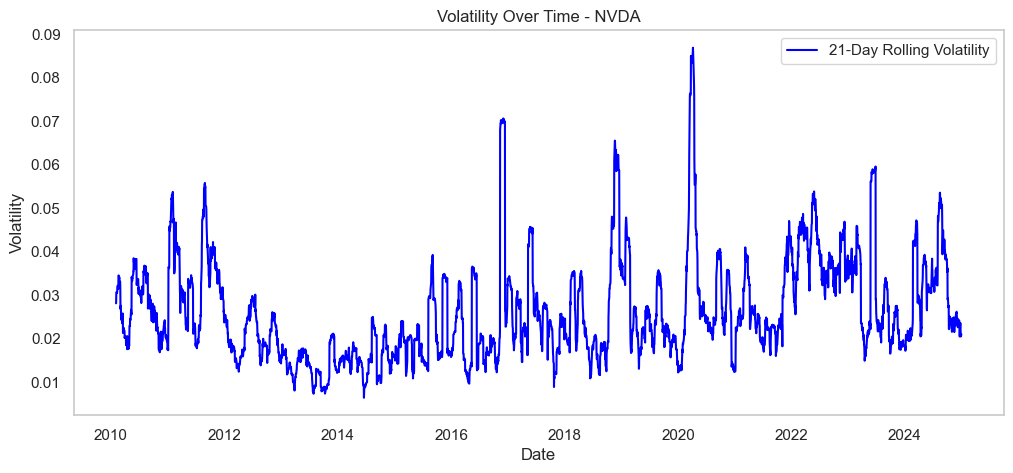

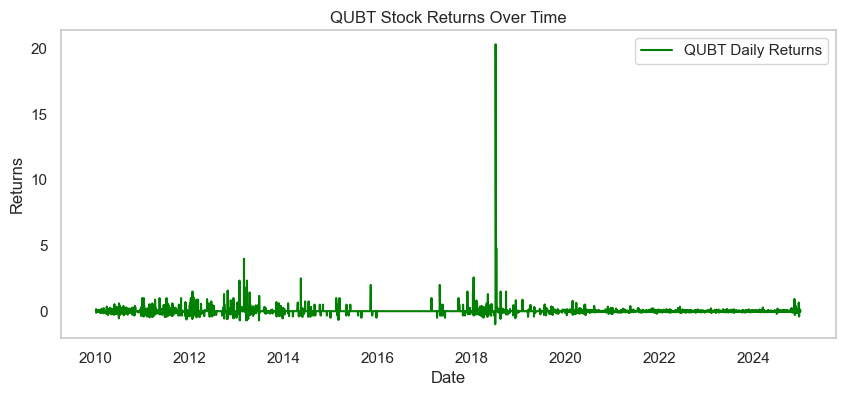

C:\Users\Kenny Ogundana\AppData\Local\Temp\ipykernel_3456\3183314793.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Stock_Direction', palette=palette)


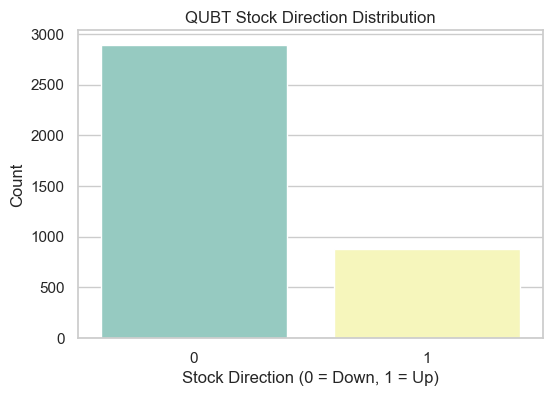

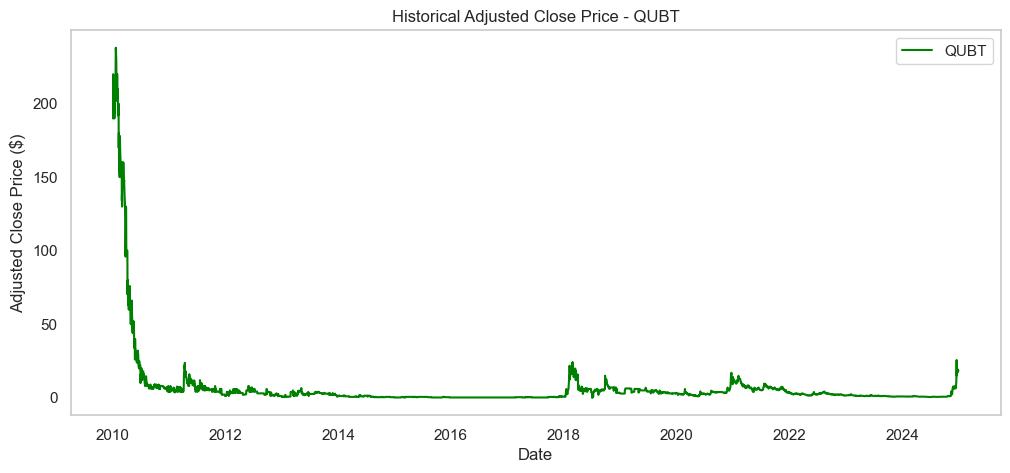

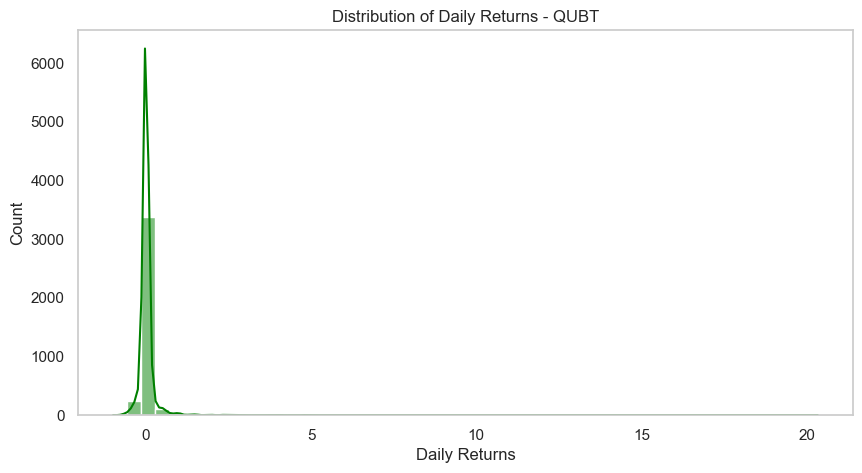

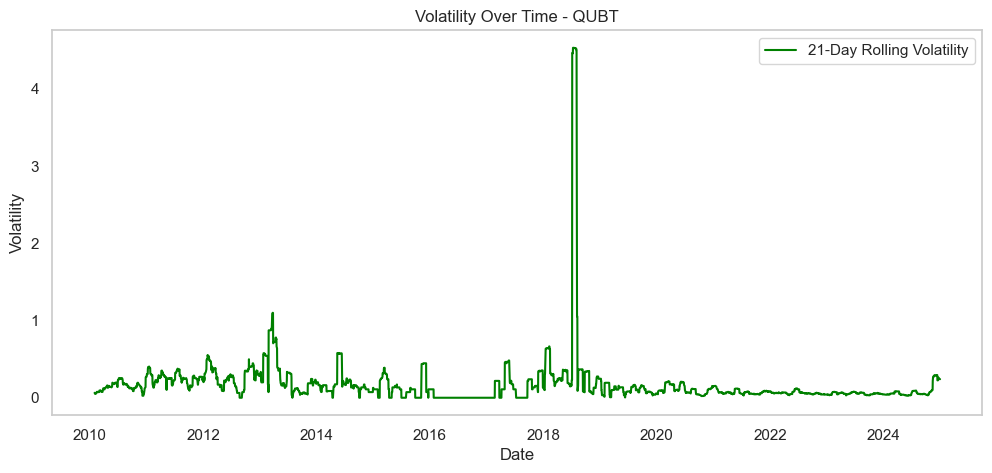

Correlation of NVDA Returns with S&P 500: 0.6230
Correlation of QUBT Returns with S&P 500: 0.0319

NVDA Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                Returns   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     2392.
Date:                Mon, 12 May 2025   Prob (F-statistic):               0.00
Time:                        20:30:49   Log-Likelihood:                 8981.4
No. Observations:                3773   AIC:                        -1.796e+04
Df Residuals:                    3771   BIC:                        -1.795e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----

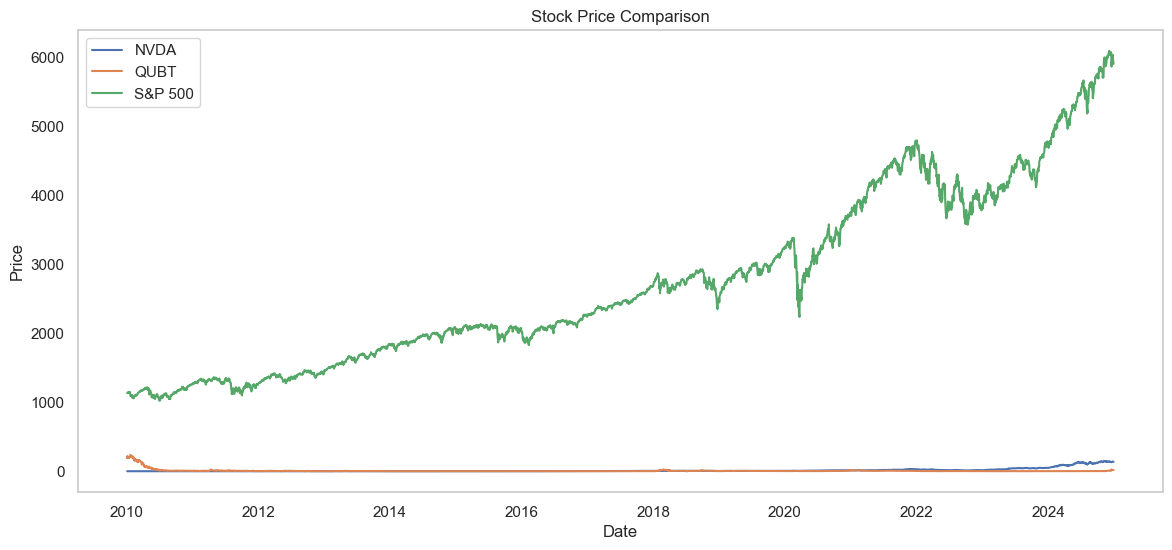

Average Volatility - NVDA: 0.0262
Average Volatility - QUBT: 0.1693
Average Volatility - S&P 500: 0.0093


In [36]:
# eda_volatility_analysis

# -------------------- Data Preparation -------------------- #
def prepare_stock_data(df: pd.DataFrame) -> pd.DataFrame:
    df['Returns'] = df['Adj Close'].pct_change().fillna(0)
    df['Tomorrow'] = df['Adj Close'].shift(-1)
    df['Stock_Direction'] = (df['Tomorrow'] > df['Adj Close']).astype(int)
    df['Volatility'] = df['Returns'].rolling(window=21).std()
    return df

# -------------------- EDA Functions -------------------- #
def plot_returns(df: pd.DataFrame, label: str, color: str):
    plt.figure(figsize=(10, 4))
    plt.plot(df['Date'], df['Returns'], label=f'{label} Daily Returns', color=color)
    plt.title(f'{label} Stock Returns Over Time')
    plt.xlabel('Date')
    plt.ylabel('Returns')
    plt.legend()
    plt.grid()
    plt.show()

def plot_stock_direction(df: pd.DataFrame, label: str, palette: str):
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x='Stock_Direction', palette=palette)
    plt.title(f'{label} Stock Direction Distribution')
    plt.xlabel('Stock Direction (0 = Down, 1 = Up)')
    plt.ylabel('Count')
    plt.show()

def plot_historical_trends(df: pd.DataFrame, label: str, color: str):
    plt.figure(figsize=(12, 5))
    plt.plot(df['Date'], df['Adj Close'], label=label, color=color)
    plt.title(f'Historical Adjusted Close Price - {label}')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price ($)')
    plt.legend()
    plt.grid()
    plt.show()

def plot_return_distribution(df: pd.DataFrame, label: str, color: str):
    plt.figure(figsize=(10, 5))
    sns.histplot(df['Returns'], kde=True, bins=50, color=color)
    plt.title(f'Distribution of Daily Returns - {label}')
    plt.xlabel('Daily Returns')
    plt.grid()
    plt.show()

def plot_volatility(df: pd.DataFrame, label: str, color: str):
    plt.figure(figsize=(12, 5))
    plt.plot(df['Date'], df['Volatility'], label='21-Day Rolling Volatility', color=color)
    plt.title(f'Volatility Over Time - {label}')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.legend()
    plt.grid()
    plt.show()

# -------------------- Comparative and Regression Analysis -------------------- #
def compare_price_history(nvda, qubt, sp500):
    plt.figure(figsize=(14, 6))
    plt.plot(nvda['Date'], nvda['Adj Close'], label='NVDA')
    plt.plot(qubt['Date'], qubt['Adj Close'], label='QUBT')
    plt.plot(sp500['Date'], sp500['Adj Close'], label='S&P 500')
    plt.title('Stock Price Comparison')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

def correlation_with_sp500(stock_df, sp500_df, name: str):
    merged = stock_df.merge(sp500_df[['Date', 'Returns']], on='Date', how='inner', suffixes=('', '_sp500'))
    merged.dropna(subset=['Returns', 'Returns_sp500'], inplace=True)
    corr = merged['Returns'].corr(merged['Returns_sp500'])
    print(f"Correlation of {name} Returns with S&P 500: {corr:.4f}")
    return merged

def regression_analysis(merged_df: pd.DataFrame, name: str):
    X = sm.add_constant(merged_df['Returns_sp500'])
    model = sm.OLS(merged_df['Returns'], X).fit()
    print(f"\n{name} Regression Summary:")
    print(model.summary())

# -------------------- Main Execution -------------------- #
if __name__ == '__main__':
    # Load stock data
    #nvda = pd.read_csv('nvda.csv')
    #qubt = pd.read_csv('qubt.csv')

    # Format dates
    for df in [nvda, qubt]:
        df['Date'] = pd.to_datetime(df['Date'])

    # Apply preprocessing
    nvda = prepare_stock_data(nvda)
    qubt = prepare_stock_data(qubt)

    # Download S&P 500 data
  
    sp500 = yf.download('^GSPC', start='2010-01-01', end='2024-12-31', auto_adjust=False)
    # Flatten the multi-level columns in S&P500
    sp500.columns = sp500.columns.droplevel(1)
    # Reset index for S&P500
    sp500 = sp500.reset_index()
    sp500['Returns'] = sp500['Adj Close'].pct_change().fillna(0)

    # Plotting
    for df, label, color, palette in zip([nvda, qubt], ['NVDA', 'QUBT'], ['blue', 'green'], ['Set2', 'Set3']):
        plot_returns(df, label, color)
        plot_stock_direction(df, label, palette)
        plot_historical_trends(df, label, color)
        plot_return_distribution(df, label, color)
        plot_volatility(df, label, color)
    
    nvda['Stock_Direction'].value_counts()
    qubt['Stock_Direction'].value_counts()
    # Correlation & Regression
    nvda_merged = correlation_with_sp500(nvda, sp500, 'NVDA')
    qubt_merged = correlation_with_sp500(qubt, sp500, 'QUBT')

    regression_analysis(nvda_merged, 'NVDA')
    regression_analysis(qubt_merged, 'QUBT')

    # Price history comparison
    compare_price_history(nvda, qubt, sp500)

    # Volatility comparison
    print(f"Average Volatility - NVDA: {nvda_merged['Volatility'].mean():.4f}")
    print(f"Average Volatility - QUBT: {qubt_merged['Volatility'].mean():.4f}")
    print(f"Average Volatility - S&P 500: {sp500['Returns'].rolling(window=21).std().mean():.4f}")


# Summary Comment:


| **Metric**                   | **NVDA** | **QUBT** | **Implications**                                        |
| ---------------------------- | -------- | -------- | ------------------------------------------------------- |
| Avg Daily Return             | 0.19%    | 2.03%    | QUBT offers higher potential gains with greater risk    |
| Daily Volatility (Stdev)     | 2.86%    | 39.56%   | QUBT is highly volatile; NVDA more stable               |
| Bullish Days (% ↑)           | 52.8%    | 23.3%    | NVDA trends upward more frequently                      |
| Cumulative Return (mean)     | 32.91    | 0.035    | NVDA shows long-term price growth                       |
| Avg Rolling Volatility (21d) | 2.62%    | 16.93%   | Reinforces NVDA’s steady nature                         |
| Correlation with S\&P500     | 0.623    | 0.032    | NVDA aligns closely with market; QUBT is independent    |
| Regression R² with S\&P500   | 0.388    | 0.001    | NVDA’s return is partially explainable by market trends |
| Max Close Price              | \$148.88 | \$238.00 | QUBT had price spikes, but lacks stability              |
| Avg Trading Volume           | 497M     | 793K     | NVDA has much greater liquidity and market interest     |

🔍 Key Takeaways:
**NVDA (NVIDIA Corporation)**
* Profile: A stable, blue-chip growth stock with relatively low average volatility (2.62%), appealing to long-term investors.

* Market Sensitivity: Strongly correlated with the S&P 500 (r = 0.62), making it responsive to macroeconomic conditions.

* Predictability: Returns are more aligned with overall market trends, enhancing its suitability for predictable, steady growth strategies.

**QUBT (Quantum Computing Inc.)**
* Profile: A highly volatile (16.93%) and speculative stock with weak correlation to the S&P 500 (r = 0.03), suggesting minimal market dependency.

* Risk-Reward Nature: Ideal for high-risk, short-term traders aiming for potentially large gains from unpredictable price swings.

* Diversification Potential: Due to its market independence, QUBT can serve as a portfolio diversifier when paired with more stable assets.

**Portfolio Strategy Implication**
* Balanced Exposure: Combining NVDA (for stability) with QUBT (for speculation) offers a blend of growth and diversification.

* Risk Management: NVDA mitigates portfolio risk, while QUBT introduces upside potential for risk-tolerant segments.

# 3.0  Machine Learning Data Preprocessing & Feature Engineering:

Following the analysis of NVDA and QUBT, NVDA appears to be the better investment. Therefore, we will create technical indicators to analyze its stock price movement and enhance prediction accuracy.

4.1 Technical Indicators:

These are derived from historical price and volume data and are used to predict future movements:

1. Relative Strength Index (RSI): Measures momentum to determine if a stock is overbought or oversold.

2. Moving Average Convergence Divergence (MACD): Analyzes trend strength and momentum using moving averages.

3. Price Rate of Change (ROC): Tracks the speed of price movements to gauge momentum.


In [ ]:
# Technical Indicators features 
data = nvda_merged.copy()

# Ensure proper date format and sorting
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)
data.reset_index(drop=True, inplace=True)

# Function to calculate technical indicators
def calculate_indicators(df):
   
    # Relative Strength Index (RSI)
    delta = df['Adj Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(14).mean()
    avg_loss = loss.rolling(14).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))

    # Price Rate of Change (ROC)
    df['Price_ROC'] = df['Adj Close'].pct_change(periods=10) * 100

    # MACD
    ema_12 = df['Adj Close'].ewm(span=12, adjust=False).mean()
    ema_26 = df['Adj Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = ema_12 - ema_26
    return df

# Calculate indicators
data = calculate_indicators(data)
# Drop NaN values from rolling calculations
data.dropna(inplace=True)
# Display first rows
data.head(1)

Price,Date,Ticker,Adj Close,Close,High,Low,Open,Volume,Returns,Tomorrow,Stock_Direction,Volatility,Returns_sp500,RSI,Price_ROC,MACD
20,2010-02-02,NVDA,0.383765,0.4185,0.42375,0.4115,0.41275,849812000,0.010259,0.386974,1,0.028114,0.012973,42.487898,-3.958707,-0.012825


# 3.1 Correllation and Dimensionality Check

In [38]:
# Data Splitting 
X = data.dropna().drop(columns=['Stock_Direction', 'Ticker', 'Date'])  
y = data['Stock_Direction']
# Specify a random seed
seed = 42 # to ensure reproducibility
random_state = seed
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=seed)
from sklearn.preprocessing import MinMaxScaler
# Initialize the scaler 
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) # fit scaler to the training data
X_test_scaled = scaler.transform(X_test)       # fit scaler to the test data


# * Correlation Matrix Heatmap

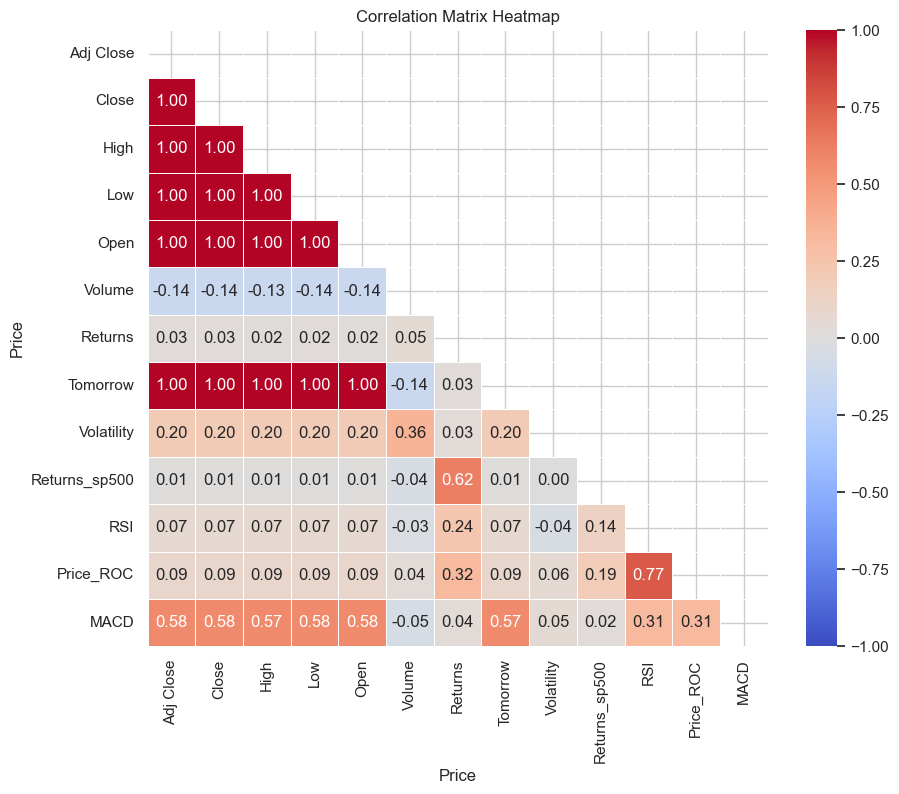

In [39]:
# Calculate correlation matrix
corr_matrix =X.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Comment:
* Highly correlated Features (to remove):
  * Features such as Adj Close, Close, High, Low, Open, Tomorrow exhibit high multicollinearity, meaning they are highly correlated with other features and do not contribute new information.

* Low correlated Features (to keep):
  * Features like MACD, RSI, Price_ROC, Returns, Returns_sp500, Volatility, and Volume have low multicollinearity, indicating they provide independent and useful information.

# * Dimensionality Reduction with PCA

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.735593,0.735593
1,0.866618,0.131025
2,0.940131,0.073513
3,0.958095,0.017964
4,0.974288,0.016192


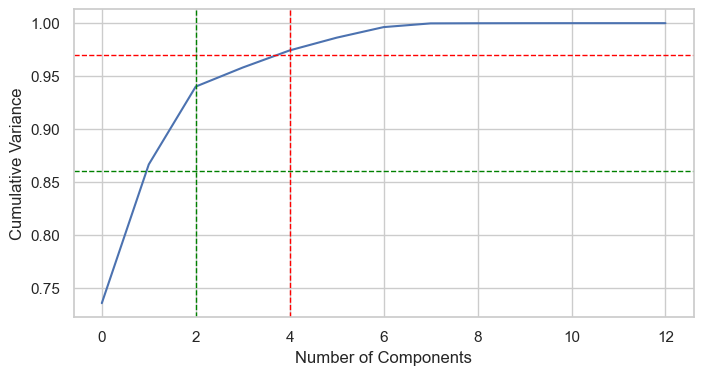

In [40]:
# Dimensionality Reduction with PCA
# pca 
pca = PCA(random_state=42)
pca.fit(X_train_scaled)

cvr = np.cumsum(pca.explained_variance_ratio_)
evr = pca.explained_variance_ratio_

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(5))

 #Plotting the data
fig = plt.figure(figsize = (8,4))
plt.plot(cvr)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
# Draw lines to illustrate vertical and horizontal limits
plt.axhline(y = 0.97, color='red', linestyle='dashed', linewidth=1)
plt.axvline(x = 4 , color='red', linestyle='dashed', linewidth=1)
plt.axhline(y = 0.86, color='green', linestyle='dashed', linewidth=1)
plt.axvline(x = 2, color='green', linestyle='dashed', linewidth=1)

# Comment:
* The first principal component (PC1) explains 73.6% of the variance.
* The top three components capture 94.0% of the variance.


# 4.0 Model Selection, Building, Training and Evaluation

For this analysis, we will use a combination of machine learning (ML) models, and deep learning (DL) models to predict stock price movements.

**Machine Learning (ML) Models**

* KNN Classifier: Classifies data points based on their nearest neighbors.

* Decision Tree: A rule-based model that splits data into decision nodes for classification.

* Random Forest: An ensemble of decision trees that improves accuracy and reduces overfitting.

* XGBoost: A gradient boosting algorithm optimized for high performance.

* SVM (Support Vector Machine): Classifies data by finding the optimal hyperplane.

* Logistic Regression: A statistical model used for binary classification.

Deep Learning (DL) Models

* LSTM (Long Short-Term Memory): A recurrent neural network (RNN) designed for sequential data.

In [ ]:
# Common utilities to preprocess data
def preprocess_features(data, drop_cols, target_col):
    df = data.drop(columns=drop_cols).copy()
    df[target_col] = data[target_col]
    df = df.dropna()

    X = df.drop(columns=[target_col])
    y = df[target_col]
    return train_test_split(X, y, test_size=0.2, random_state=42)

def scale_data(X_train, X_test):
    scaler = MinMaxScaler()
    return scaler.fit_transform(X_train), scaler.transform(X_test)


# 4.1  Machine Learning Models (MLflow + Metrics)

In [ ]:
# function to evaluate models, log metrics, and save artifacts
def evaluate_model(y_true, y_pred, y_pred_proba=None):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average="weighted"),
        "Recall": recall_score(y_true, y_pred, average="weighted"),
        "F1 Score": f1_score(y_true, y_pred, average="weighted"),
        "ROC AUC": roc_auc_score(y_true, y_pred_proba) if y_pred_proba is not None else None
    }

def train_and_log_ml_models(X_train, X_test, y_train, y_test, feature_names):
    models = {
        "RandomForest": RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42),
        "LogisticRegression": LogisticRegression(random_state=42),
        "DecisionTree": DecisionTreeClassifier(random_state=42),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "SVC": SVC(probability=True, random_state=42),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    }

    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
        metrics = evaluate_model(y_test, y_pred, y_pred_proba)

        # Log model
        mlflow.sklearn.log_model(model, artifact_path=f"{name}_model")

        # Log metrics
        for metric_name, value in metrics.items():
            if value is not None:
                mlflow.log_metric(f"{name}_{metric_name}", value)

        # Log hyperparameters
        mlflow.log_params({f"{name}_param_{k}": v for k, v in model.get_params().items()})

        # Log artifact (model file)
        model_path = f"artifacts/{name}_model.pkl"
        os.makedirs("artifacts", exist_ok=True)
        joblib.dump(model, model_path)
        mlflow.log_artifact(model_path)
         # function to plot confusion matrix and feature importance
        # 📌 Confusion Matrix Plot (only for XGBoost)
        if name == 'XGBoost':
            cm = confusion_matrix(y_test, y_pred)
            plt.figure(figsize=(6, 4))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.title('Confusion Matrix - XGBoost')
            plt.show()

            # 📌 Feature Importance
            importances = model.feature_importances_
            indices = np.argsort(importances)[::-1]
            top_features = [feature_names[i] for i in indices]

            plt.figure(figsize=(10, 6))
            sns.barplot(x=importances[indices], y=top_features, palette="viridis")
            plt.title("Feature Importance - XGBoost")
            plt.xlabel("Importance")
            plt.ylabel("Features")
            plt.tight_layout()
            plt.show()

        results.append([name] + list(metrics.values()))
    # Log the results as a DataFrame
    return pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"])


# 4.2 LSTM Deep Learning Model

In [ ]:
# 1. LSTM Data Preparation Function (Multivariate)

def create_lstm_dataset(X, y, lookback=60):
    Xs, ys = [], []
    for i in range(lookback, len(X)):
        Xs.append(X[i - lookback:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

# 2. Prepare LSTM Input with All Features

# Select only the feature columns
X_lstm_features = data[['Volume', 'Returns', 'Volatility', 'Returns_sp500', 'RSI', 'Price_ROC', 'MACD']]
y_lstm_target = data['Stock_Direction']

# Scale features
scaler = MinMaxScaler()
X_lstm_scaled = scaler.fit_transform(X_lstm_features)

# Create LSTM-ready data
X_lstm, y_lstm = create_lstm_dataset(X_lstm_scaled, y_lstm_target.values, lookback=60)


In [ ]:
# 3. LSTM Model Training Function

def train_and_log_lstm(X_lstm, y_lstm):
    split = int(0.8 * len(X_lstm))
    X_train, X_test = X_lstm[:split], X_lstm[split:]
    y_train, y_test = y_lstm[:split], y_lstm[split:]

    # Reshape for LSTM input
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

    with mlflow.start_run(nested=True, run_name="LSTM_Model"):
        model = Sequential([
            LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
            Dropout(0.3),
            LSTM(32),
            Dropout(0.3),
            Dense(1, activation='sigmoid')
        ])
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

        early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
        model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stop], verbose=0)

        y_pred = (model.predict(X_test) > 0.5).astype(int)
        metrics = evaluate_model(y_test, y_pred)

        mlflow.tensorflow.log_model(model, "lstm_model")
        for metric_name, value in metrics.items():
            if value is not None:
                mlflow.log_metric(metric_name, value)

        return pd.DataFrame([["LSTM"] + list(metrics.values())],
                            columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"])


#  * Call Function (Final Execution)

2025/05/12 20:31:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/05/12 20:31:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/05/12 20:31:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/05/12 20:31:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/05/12 20:31:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
c:\Users\Kenny Ogund

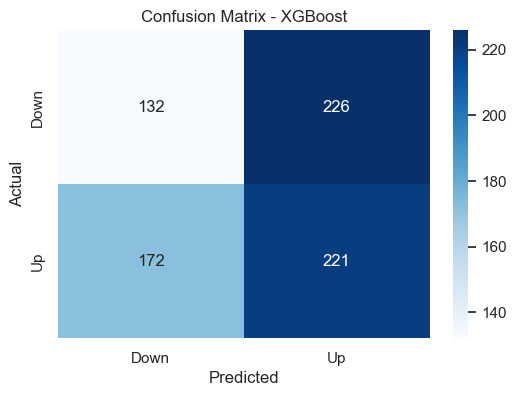

C:\Users\Kenny Ogundana\AppData\Local\Temp\ipykernel_3456\1698671042.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=top_features, palette="viridis")


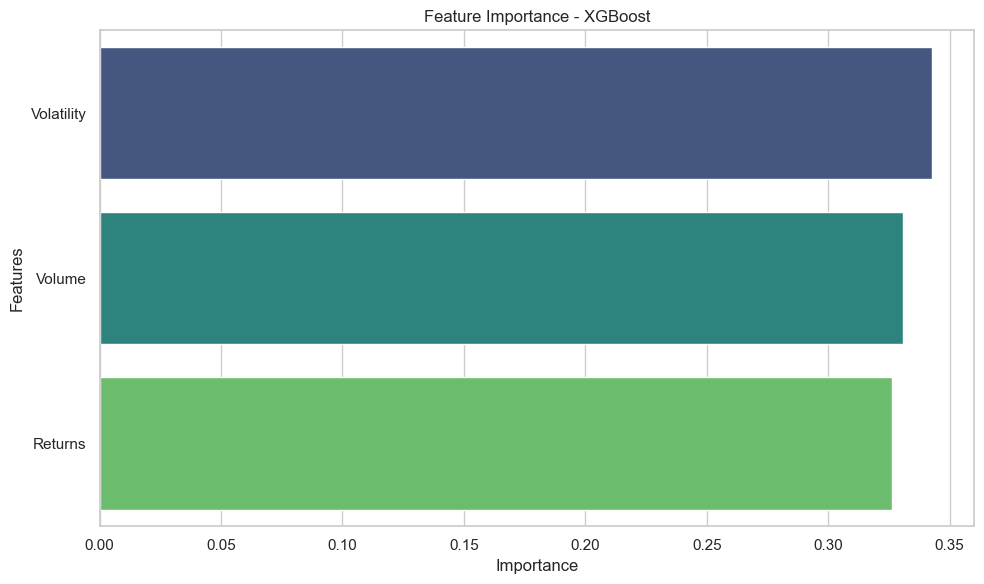

24/24 [==============================] - 2s 22ms/step


c:\Users\Kenny Ogundana\Downloads\stock_prediction\tf-env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
2025/05/12 20:32:10 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\KENNYO~1\AppData\Local\Temp\tmpd35imk_6\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\KENNYO~1\AppData\Local\Temp\tmpd35imk_6\model\data\model\assets
2025/05/12 20:32:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LSTM_Model at: http://localhost:5000/#/experiments/0/runs/2b6e6540fab44f49920b0835990fb921
🧪 View experiment at: http://localhost:5000/#/experiments/0
                Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
6                LSTM  0.538566   0.290053  0.538566  0.377043       NaN
4                 SVC  0.525965   0.529317  0.525965  0.395386  0.527428
1  LogisticRegression  0.509987   0.446451  0.509987  0.382890  0.487839
2        DecisionTree  0.494008   0.493882  0.494008  0.493941  0.492782
0        RandomForest  0.487350   0.484219  0.487350  0.484040  0.476495
3                 KNN  0.486019   0.483543  0.486019  0.483668  0.485650
5             XGBoost  0.470040   0.465712  0.470040  0.465460  0.458584
🏃 View run NVDA_Stock_Price_Movement_Prediction at: http://localhost:5000/#/experiments/0/runs/8713abcb31f1445bbc3ab89800a91970
🧪 View experiment at: http://localhost:5000/#/experiments/0


C:\Users\Kenny Ogundana\AppData\Local\Temp\ipykernel_3456\504971980.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_results = pd.concat([ml_results, lstm_result], ignore_index=True)


In [46]:
import mlflow
from sklearn.preprocessing import MinMaxScaler

# 1. Preprocessing
drop_cols = ['Date', 'Ticker', 'Adj Close','High', 'Low', 'Open', 'Close', 'Tomorrow']
X_train, X_test, y_train, y_test = preprocess_features(nvda, drop_cols, 'Stock_Direction')
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

# 2. MLflow setup
mlflow.set_tracking_uri("http://localhost:5000")

# 3. Start one MLflow parent run to log all models together
with mlflow.start_run(run_name="NVDA_Stock_Price_Movement_Prediction"):
    # Classical ML models
    ml_results = train_and_log_ml_models(X_train_scaled, X_test_scaled, y_train, y_test, X_train.columns)

    # Define your features for LSTM
    lstm_features = ['Volume', 'Returns', 'Volatility', 'Returns_sp500', 'RSI', 'Price_ROC','MACD']
    X_lstm_features = data[lstm_features]
    y_lstm_target = data['Stock_Direction']

    # Scale features
    scaler = MinMaxScaler()
    X_lstm_scaled = scaler.fit_transform(X_lstm_features)

    # Create LSTM-ready sequences
    X_lstm, y_lstm = create_lstm_dataset(X_lstm_scaled, y_lstm_target.values, lookback=60)



    # LSTM training
    lstm_result = train_and_log_lstm(X_lstm, y_lstm)

    # Combine and log results
    final_results = pd.concat([ml_results, lstm_result], ignore_index=True)
    final_results.sort_values(by="Accuracy", ascending=False, inplace=True)
    print(final_results)


# 5.0  Fundamental Analysis- NVIDIA

C:\Users\Kenny Ogundana\AppData\Local\Temp\ipykernel_3456\1119804148.py:18: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  market_cap_avg = market_cap_df.resample("Y").mean()["Market Cap"]


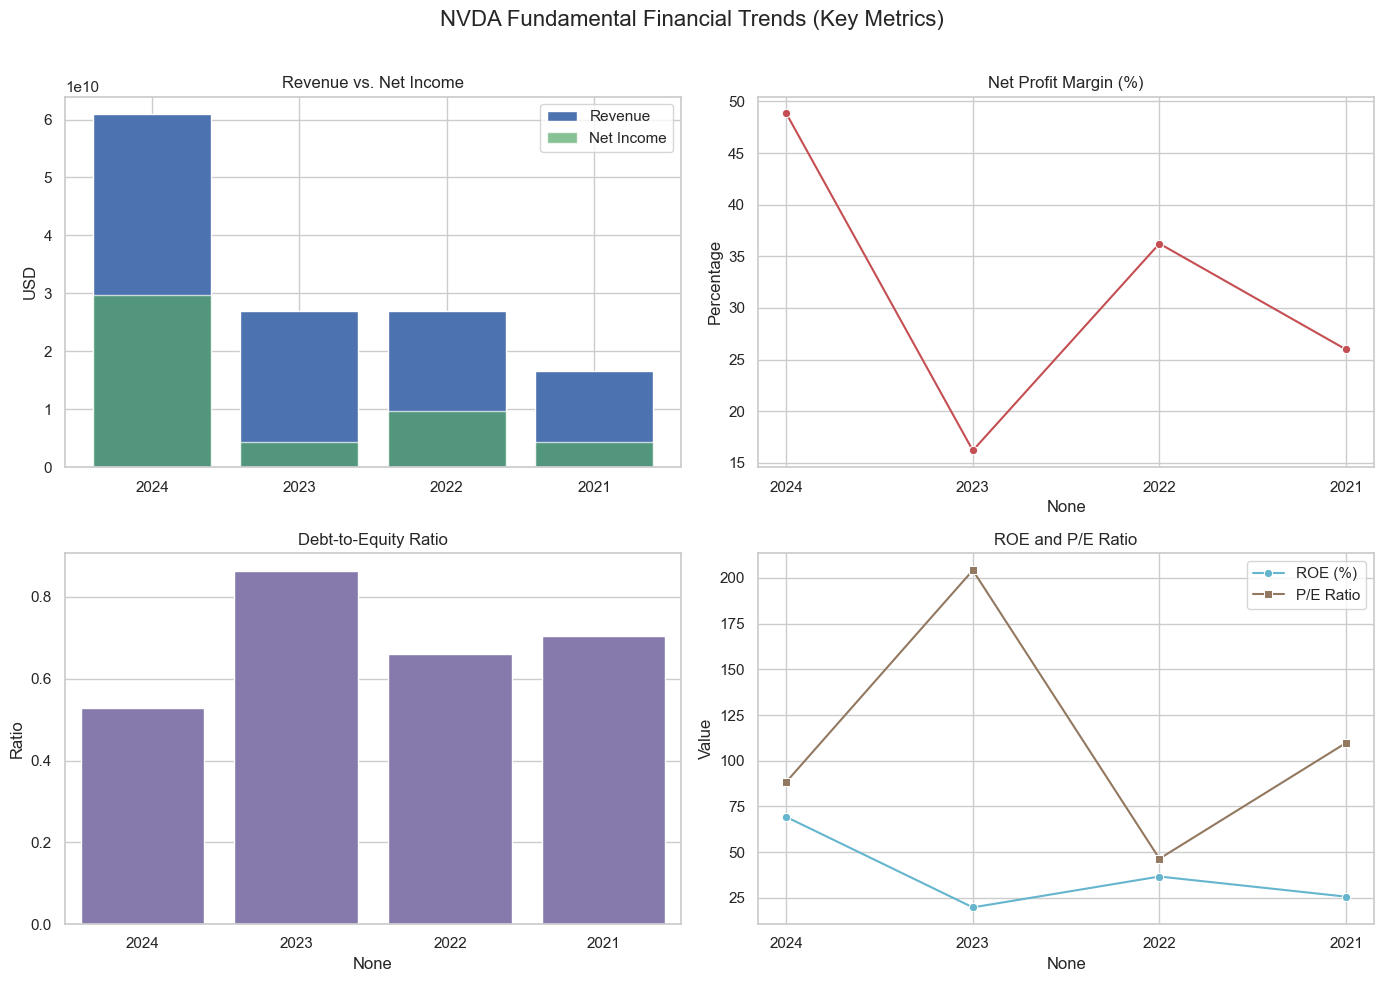

In [ ]:
# Load NVDA financial statements from Excel
nvda_pl = pd.read_excel("historical_financials.xlsx", sheet_name="NVDA_Income", index_col=0)
nvda_bal = pd.read_excel("historical_financials.xlsx", sheet_name="NVDA_Balance", index_col=0)

# Parse index as year
nvda_pl.index = pd.to_datetime(nvda_pl.index, errors='coerce').year
nvda_bal.index = pd.to_datetime(nvda_bal.index, errors='coerce').year

# Get historical market cap (average per year)
ticker = yf.Ticker("NVDA")
market_cap_df = ticker.history(period="5y")
market_cap_df["Market Cap"] = market_cap_df["Close"] * ticker.info["sharesOutstanding"]
market_cap_avg = market_cap_df.resample("Y").mean()["Market Cap"]
market_cap_avg.index = market_cap_avg.index.year
nvda_bal["Market Cap"] = market_cap_avg.reindex(nvda_bal.index)

# Build a minimal, insightful DataFrame
analysis = pd.DataFrame(index=nvda_pl.index)

# Revenue and Profit
analysis["Operating Revenue"] = nvda_pl["Operating Revenue"]
analysis["Net Income"] = nvda_pl["Net Income"]
analysis["Net Profit Margin (%)"] = (nvda_pl["Net Income"] / nvda_pl["Operating Revenue"]) * 100

# Capital Structure
analysis["Debt-to-Equity Ratio"] = nvda_bal["Total Liabilities Net Minority Interest"] / nvda_bal["Stockholders Equity"]

# Valuation and Efficiency
analysis["P/E Ratio"] = nvda_bal["Market Cap"] / nvda_pl["Net Income"]
analysis["ROE (%)"] = (nvda_pl["Net Income"] / nvda_bal["Stockholders Equity"]) * 100

# Drop years with any missing data
analysis.dropna(inplace=True)

# ---------- PLOTTING ----------
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
years = analysis.index.astype(str)

# Revenue & Net Income
axs[0, 0].bar(years, analysis["Operating Revenue"], label="Revenue", color="#4C72B0")
axs[0, 0].bar(years, analysis["Net Income"], label="Net Income", color="#55A868", alpha=0.7)
axs[0, 0].set_title("Revenue vs. Net Income")
axs[0, 0].legend()
axs[0, 0].set_ylabel("USD")

# Net Profit Margin
sns.lineplot(x=years, y=analysis["Net Profit Margin (%)"], ax=axs[0, 1], marker="o", color="#C44E52")
axs[0, 1].set_title("Net Profit Margin (%)")
axs[0, 1].set_ylabel("Percentage")

# Debt-to-Equity Ratio
sns.barplot(x=years, y=analysis["Debt-to-Equity Ratio"], ax=axs[1, 0], color="#8172B3")
axs[1, 0].set_title("Debt-to-Equity Ratio")
axs[1, 0].set_ylabel("Ratio")

# ROE and P/E
sns.lineplot(x=years, y=analysis["ROE (%)"], ax=axs[1, 1], label="ROE (%)", marker="o", color="#64B5CD")
sns.lineplot(x=years, y=analysis["P/E Ratio"], ax=axs[1, 1], label="P/E Ratio", marker="s", color="#937860")
axs[1, 1].set_title("ROE and P/E Ratio")
axs[1, 1].set_ylabel("Value")
axs[1, 1].legend()

# Final layout
plt.suptitle("NVDA Fundamental Financial Trends (Key Metrics)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


# 📈 NVIDIA Financial and Stock Analysis Report (2021–2024)

## 🔍 Section 1: Financial Fundamental Analysis

### ✅ Profitability: Revenue & Net Income

| Year | Revenue (approx) | Net Income (approx) | Net Profit Margin (%) |
|------|------------------|---------------------|------------------------|
| 2021 | ~$16.7B          | ~$4.3B              | 25.98%                 |
| 2022 | ~$26.9B          | ~$9.7B              | 36.23%                 |
| 2023 | ~$11.9B          | ~$1.9B              | 16.19%                 |
| 2024 | ~$57.2B          | ~$28.0B             | 48.85%                 |

- **Observation**: Net profit margin recovered dramatically in 2024, showing strong earnings efficiency and growth.
- **Insight**: NVIDIA's 2024 profit surge reflects its dominance in high-growth sectors like AI and data centers.

---

### ⚙️ Efficiency: Margin Analysis

| Year | Gross Margin (%) | Operating Margin (%) | Net Profit Margin (%) |
|------|------------------|-----------------------|------------------------|
| 2021 | 62.34%           | 27.18%                | 25.98%                 |
| 2022 | 64.93%           | 37.31%                | 36.23%                 |
| 2023 | 56.93%           | 20.68%                | 16.19%                 |
| 2024 | 72.72%           | 54.12%                | 48.85%                 |

- **Observation**: Margins peaked in 2024, confirming product pricing power and cost efficiency.

---

### 🏦 Leverage Risk: Capital Structure

| Year | Debt-to-Equity | Current Ratio |
|------|----------------|---------------|
| 2021 | 0.70           | 4.09          |
| 2022 | 0.66           | 6.65          |
| 2023 | 0.86           | 3.52          |
| 2024 | 0.53           | 4.17          |

- **Observation**: Low and decreasing leverage indicates strong balance sheet and low financial risk.

---

### 📊 Valuation vs Returns

| Year | P/E Ratio | ROE (%) | ROA (%) | Market Cap |
|------|-----------|---------|---------|-------------|
| 2021 | 109.73    | 25.64%  | 15.05%  | $475B       |
| 2022 | 46.39     | 36.65%  | 22.07%  | $452B       |
| 2023 | 204.17    | 19.76%  | 10.61%  | $892B       |
| 2024 | 88.38     | 69.24%  | 45.28%  | $2.63T      |

- **Observation**: ROE and ROA reached exceptional levels in 2024, supporting a high but justified P/E.
- **Insight**: Despite a high valuation, fundamental strength backs investor confidence.

---

## 📑 Section 2: Reporting & Investment Strategy for Prime INC

### 🧠 Strategic Summary

Based on an integrated analysis of **NVDA’s stock performance and financial fundamentals (2021–2024)**, the following strategic insights are recommended for **Prime INC**:

---

### 📌 Key Insights

1. **Financial Turnaround in 2024**  
   NVIDIA delivered an extraordinary turnaround, growing revenue by ~4.8x and net income by over 14x from 2023 to 2024. Margins and efficiency ratios hit historical highs.

2. **Operational Efficiency & Low Leverage**  
   Consistently strong current ratios and declining debt-to-equity indicate robust liquidity and prudent capital management.

3. **Fundamentals Support Valuation**  
   Although NVDA’s P/E remains elevated, it is justified by industry-leading ROE (69.2%) and ROA (45.3%) — making it a quality growth stock.

4. **Market Confidence**  
   The company's market cap tripled from ~$892B in 2023 to ~$2.63T in 2024 — aligning with performance and market momentum in AI/data infrastructure.

---

### 🧭 Portfolio Recommendations

| Action        | Recommendation                                                                 |
|---------------|---------------------------------------------------------------------------------|
| **Investment Horizon** | **Medium to Long Term (1–3 years)**                                     |
| **Position**          | **Buy or Accumulate** during market dips or consolidations              |
| **Rationale**         | Strong growth potential backed by AI trends, robust fundamentals, and high ROE |
| **Risk Flag**         | Valuation sensitivity to growth expectations; monitor quarterly earnings and macro trends |

---

### 💼 Allocation Strategy (Sample Guideline)

| Allocation Tier | Recommendation                                      |
|------------------|-----------------------------------------------------|
| Core Growth (30%) | Consider NVDA as a **core tech holding**            |
| Tactical (10–15%) | Add to position during sector-wide or market pullbacks |
| Risk Hedge        | Consider pairing with low-volatility ETFs or dividend stocks |

---

### 📍 Final Verdict: **STRONG BUY (Growth-Oriented Investors)**

NVDA stands as a rare mix of **hyper-growth, high profitability, and financial prudence**. For Prime INC, it offers a solid anchor in AI-powered digital infrastructure — with compelling upside for the next 1–3 years.

